## Install Libraries

In [1]:
import os
os.system("pip install pystan==2.19.1.1 fbprophet==0.06")
os.system("pip install slack")
os.system("pip install slackclient")
os.system("pip install yfinance")
os.system("pip install yahoofinancials")
os.system("pip install statsmodels")
os.system("pip install sklearn")

## Import Packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

import yfinance as yf
from yahoofinancials import YahooFinancials
import statistics
from statistics import stdev

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet
from datetime import date
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot

from typing import  List
from datetime import datetime
from io import StringIO
import joblib

from slack import WebClient
from slack.errors import SlackApiError

Importing plotly failed. Interactive plots will not work.


## Pipeline Parameters
- token : Slack token to send message to slck channel
- channel : slack channel name
- periods_prediction_in_days : Numer of days from today you want to predict the stock
- path : path where you want to store the results and model
- ticker : The ticker to which you want to predict the stock price. Name of the ticker can be found here https://www.nasdaq.com/market-activity/stocks/screener 

Note : You can predict stock for any ticker only if model is trained for that ticker. So if you want to predict for any new ticker, run modelling pipeline for that ticker

In [3]:
token = ""
channel = '#test'
periods_prediction_in_days = 5 #days
path = "/kfs_private/yahoo_stock/"
ticker = 'TSLA' 

## Load Model
- Load the model that is stored from modelling pipeline

In [4]:
MODEL_NAME = "yahoo_stock_model_"+ticker

## Future Data
- Create future data based on provided number of days to be predicted

In [5]:
# run_id = "cc047c20511e4f2182246f4466cafc9d"
# model_uri = "runs:/" + run_id + "/model"
model = joblib.load(path+MODEL_NAME+".joblib")

In [6]:
#future=model.make_future_dataframe(periods=30,freq='D',include_history=False) #as the time stamp is Quaterly & 4 is for test data records
today = date.today().strftime("%d-%m-%Y")
future = pd.date_range(start=today, periods=periods_prediction_in_days).to_frame(index = False, name='ds')

## Predict 
- predict the future stock price for the ticker

In [7]:
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-18,920.673486,823.540845,1014.107983
1,2022-01-19,921.498592,832.462249,1011.610321
2,2022-01-20,922.307858,833.251436,1013.731481
3,2022-01-21,922.413486,827.012058,1016.701708
4,2022-01-22,916.270592,820.066250,1011.387244


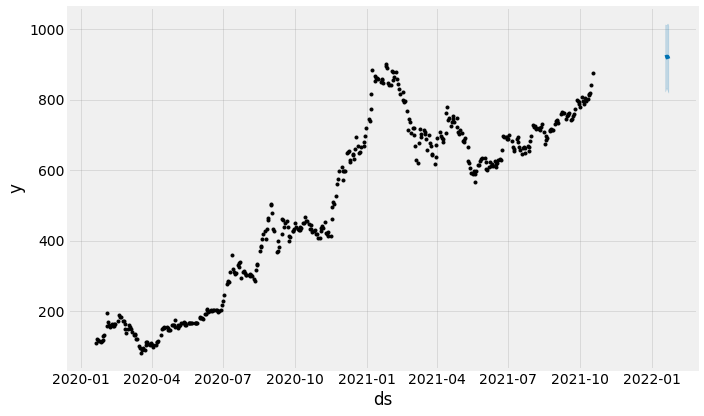

In [10]:
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()

## Stack Message

In [9]:
forecast[['ds','yhat']].to_csv(path+"output_"+ticker+".csv",index=False)
file = path+"output_"+ticker+".csv"
title = "Amazon Revenue"
text = "Yahoo Stock Prediction for " + ticker

client = WebClient(token=token)

try:
    response = client.chat_postMessage(
        channel=channel,
        text=text)
    response = client.files_upload(
        channels=channel,
        file=file,
        title=title
)
except SlackApiError as e:
    # You will get a SlackApiError if "ok" is False
    assert e.response["ok"] is False
    assert e.response["error"]  # str like 'invalid_auth', 'channel_not_found'
    print(f"Got an error: {e.response['error']}")

Got an error: not_authed
